In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def perceptron(X: np.ndarray, y0: np.ndarray, eta=0.1  , tmax=math.pow(10,3)):
    N, P = X.shape
    w = np.random.rand(N)
    converged = False

    for epoch in range(int(tmax)):
        dot_product = np.dot(X.T, w)

        y_pred = np.sign(dot_product).flatten()
        y_pred[y_pred == 0] = -1  # Replace 0 with -1 (as wrong prediction)
        misclassified = np.where(y_pred != y0)[0]

        if misclassified.size == 0:
            converged = True
            break

        update = np.sum(X[:, misclassified] * y0[misclassified], axis=1)
        w += eta*update

    return w, converged, epoch + 1

In [3]:
def plot(X, y0, w):
    """
    Parameters:
    - X: N x P matrix of points
    - y0: P-dimensional vector of labels (-1 or 1)
    - w: Coefficients of the hyperplane.
    """
    # Scatter points based on labels
    plt.scatter(X[0, y0 == -1], X[1, y0 == -1], color='red', label='Label -1')
    plt.scatter(X[0, y0 == 1], X[1, y0 == 1], color='green', label='Label 1')

    # Plot the hyperplane
    # perpendicular_v = perpendicular_vector(w)
    perpendicular_v = w
    x_points = np.linspace(-10, 10, 100)
    y_points_hyperplane = -(perpendicular_v[0] * x_points) / perpendicular_v[1]
    plt.plot(x_points, y_points_hyperplane, label='Hyperplane seperator', color='black')

    # Plot lines on either side for separation
    y_points_above = y_points_hyperplane + 0.3
    y_points_below = y_points_hyperplane - 0.3
    plt.plot(x_points, y_points_above, linestyle='--', color='red')
    plt.plot(x_points, y_points_below, linestyle='--', color='green')

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Points and Hyperplane seperator')
    plt.legend()

    # Add grid lines
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()

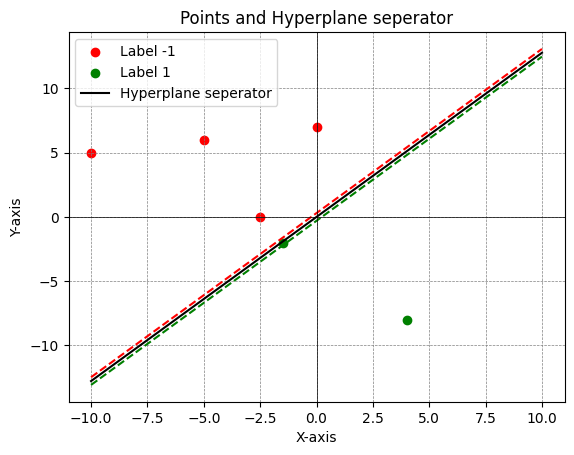

In [4]:
# Example usage:
# X is the input matrix, y0 is the label vector
X = np.array([[-10,5], [-5,6],[-2.5, 0], [0,7], [4,-8], [-1.5,-2]]).T 
y0 = np.array([-1, -1, -1, -1, 1, 1])  
(w, converged, epoch) = perceptron(X, y0)
plot(X, y0, w)


In [5]:
def generate_random_data(N, P):
    """
    Generate random data with a matrix X of shape N x P and a label vector y0 of length P.

    Parameters:
    - N: Number of rows in the matrix.
    - P: Number of columns in the matrix and length of the label vector.

    Returns:
    - X: N x P matrix with random values from the set {-1, 1}.
    - y0: Random label vector of length P with values from the set {-1, 1}.
    """
    X = np.random.choice([-1, 1], size=(N, P))
    y0 = np.random.choice([-1, 1], size=P)

    return X, y0


In [6]:
def get_average(n, N, P, tmax=math.pow(10,3), just_separable_results = False):
    epochs = np.zeros(n)
    has_converged = np.zeros(n)
    for i in range(n):
        achieved_convergence = False
        converged = False
        epoch = 0
        while not achieved_convergence:
            X, y0 = generate_random_data(N, P)
            (_, converged, epoch) = perceptron(X, y0, tmax)    
            if just_separable_results:
                achieved_convergence = converged
            else:            
                achieved_convergence = True 
        epochs[i] = epoch
        has_converged[i] = converged
    return np.mean(epochs), np.mean(has_converged)
            
        
def ex_2(n=100):
    P = 10
    Ns = range(10, 101, 1)
    mean_epochs = np.zeros(len(Ns))
    for i, N in enumerate(Ns):
        (mean_epochs[i], _) = get_average(n, N, P, just_separable_results=True)
    return Ns, mean_epochs
        
    

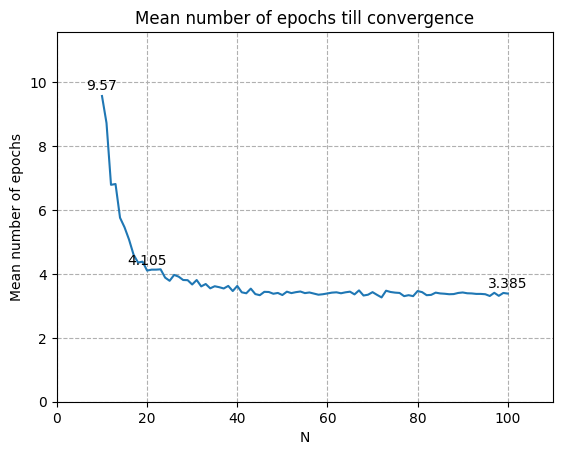

In [7]:
(Ns, epochs) = ex_2(n=200)
indices = np.argwhere(np.isin(Ns, [10,20,100])).flatten().astype(np.int16)
for i in iter(indices):
    plt.text(Ns[i], epochs[i] + 0.1, str(epochs[i]), ha='center', va='bottom')
plt.plot(Ns, epochs)
plt.title('Mean number of epochs till convergence')
plt.xlabel('N')
plt.ylabel('Mean number of epochs')
plt.ylim(0, max(epochs) + 2)
plt.xlim(0, 110)
plt.grid(True, linestyle='--', alpha=1)


In [8]:
def ex_3(N, alphas, n=100, tmax=math.pow(10,3)):
    Ps = np.floor(alphas*N).astype(np.int16)
    probabilities_of_convergence = np.zeros(len(Ps))
    for i, P in enumerate(Ps):
        (_, probabilities_of_convergence[i]) = get_average(n, N, P, tmax)
    return alphas, Ps, probabilities_of_convergence
    

In [ ]:
alphas = np.linspace(0.1, 3, 100)
(_, _, probabilities_5_pow3) = ex_3(20, alphas, tmax=math.pow(10,3))
(_, _, probabilities_5_pow4) = ex_3(20, alphas, tmax=math.pow(10,4))
(_, _, probabilities_5_pow5) = ex_3(20, alphas, tmax=math.pow(10,5))

In [ ]:
plt.figure(figsize=(5, 3))

# Plot for N=5
plt.plot(alphas, probabilities_5_pow3, label='N=20, tmax=10^3', color='blue', linestyle='-')

# Plot for N=20
plt.plot(alphas, probabilities_5_pow4, label='N=20, tmax=10^4', color='green', linestyle='--')

# Plot for N=100
plt.plot(alphas, probabilities_5_pow5, label='N=20, tmax=10^5', color='red', linestyle='-.')

# Set labels and title
plt.xlabel('Alpha')
plt.ylabel('Probability')
plt.title('Probability vs. Alpha for Different tMAX')
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
(_, _, probabilities_5) = ex_3(5, alphas)
(_, _, probabilities_20) = ex_3(20, alphas)
(_, _, probabilities_100) = ex_3(100, alphas)

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot for N=5
axes[0].plot(alphas, probabilities_5, label='N=5')
axes[0].set_title('N=5')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Probability')
axes[0].grid(True)

# Plot for N=20
axes[1].plot(alphas, probabilities_20, label='N=20')
axes[1].set_title('N=20')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Probability')
axes[1].grid(True)

# Plot for N=100
axes[2].plot(alphas, probabilities_100, label='N=100')
axes[2].set_title('N=100')
axes[2].set_xlabel('Alpha')
axes[2].set_ylabel('Probability')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
def get_number_of_dichotomies(Ps, N):
    sum_values = np.zeros(len(Ps)).astype(np.float64)
    for i, P in enumerate(Ps):
        for k in range(N):
            sum_values[i] += math.comb(P - 1, k)
    return sum_values

def get_Ps(alphas, N):
    return np.floor(alphas*N + 1).astype(np.int64)